In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def Centroids(points, k):
  cm=[]
  for i in range(k):
    ind=np.where(points[:,-1]==i)[0]
    mean=np.mean(points[ind,:-1], axis=0)
    cm.append(mean)
  return cm

In [3]:
def Distances(points, cm, k):
  n=np.shape(points)[0]
  Dist=np.zeros((n,k))
  for i in range(k):
    dif=points[:,:-1]-cm[i]
    col=np.linalg.norm(dif, axis=1)
    Dist[:,i]=col
  return Dist

In [4]:
def update_k(points, Dist):
  points[:,-1]=np.argmin(Dist, axis=1)
  return points

In [5]:
def plot_k(points, k, centroids):
  cmx=np.array(centroids)
  sns.set(rc={'figure.figsize':(10,7)})
  for i in range(k):
    ind=np.where(points[:,-1]==i)[0]
    sns.scatterplot(x=points[ind,0], y=points[ind,1])
  sns.scatterplot(x=cmx[:,0], y=cmx[:,1], s=200, marker="X") 
  plt.legend(np.append([str(i) for i in range(3)], 'centroid'))   

In [6]:
def training(points, k):
  cent=Centroids(points, k)
  dist=Distances(points, cent, k)
  points=update_k(points,dist)
  return points, cent

### Simular datos

In [7]:
N = 198
data1 = np.random.randn(N//3,2) + np.array([5,6])
data2 = np.random.randn(N//3,2) + np.array([-5,-6])
data3 = np.random.randn(N//3,2) + np.array([-10,3])
data = np.concatenate((data1, data2, data3))

### Selección de número de grupos

In [8]:
K=3
#Inicialización de los grupos
groups=np.random.choice(K,N).reshape((N,1))
points=np.concatenate((data,groups), axis=1)
cm_0=Centroids(points, K)

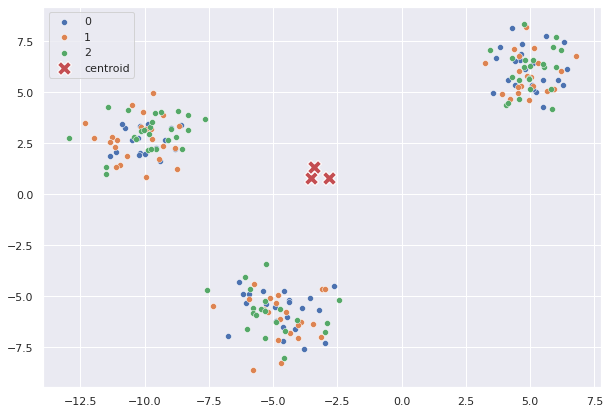

In [9]:
plot_k(points,K, cm_0)

In [10]:
for epoch in range(100):
  points,cm_new=training(points, K)
  if np.sum(np.array(cm_new)==np.array(cm_0))==np.size(cm_0) and epoch!=0:
    break
  cm_0=cm_new

Epoch : 3


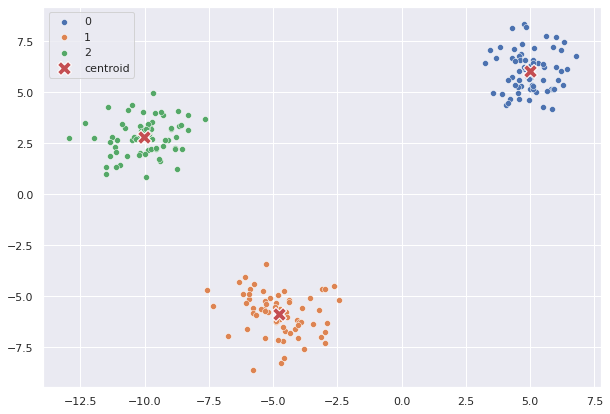

In [11]:
print('Epoch :', epoch)
plot_k(points,K, cm_new)